In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-suicide-statistics/who_suicide_statistics.csv


In [6]:
data = pd.read_csv('/kaggle/input/who-suicide-statistics/who_suicide_statistics.csv')
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [8]:
data.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

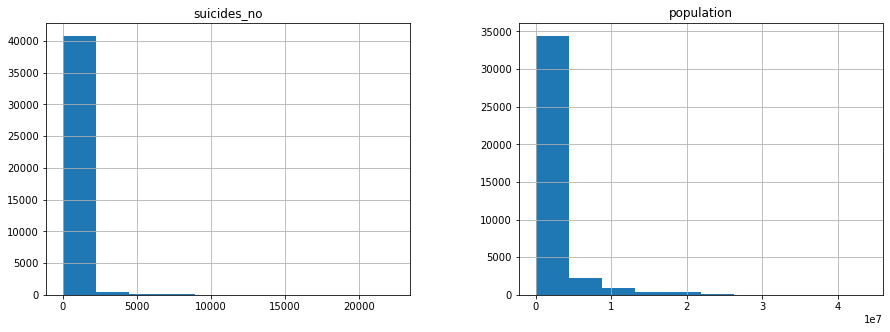

In [9]:
# data distribution for suicide_no and population, cause we need to impute with mean() or median()
data.select_dtypes(include= np.float64).hist(figsize = (15,5))
plt.show()

In [10]:
data.select_dtypes(include= np.float64).describe().T

,count,mean,std,min,25%,50%,75%,max
suicides_no,41520.0,1.933154e+02,8.005899e+02,0.0,1.00,14.0,91.0,22338.0
population,38316.0,1.664091e+06,3.647231e+06,259.0,85112.75,380655.0,1305698.0,43805214.0


In [11]:
print(data['suicides_no'].mean())
print(data['suicides_no'].median())

193.3153901734104
14.0


In [13]:
for i in data.select_dtypes(include= np.float64).columns:
    data[i] = data[i].replace(np.NaN, data[i].median())

In [14]:
data.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [17]:
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,14.0,277900.0
1,Albania,1985,female,25-34 years,14.0,246800.0
2,Albania,1985,female,35-54 years,14.0,267500.0
3,Albania,1985,female,5-14 years,14.0,298300.0
4,Albania,1985,female,55-74 years,14.0,138700.0


In [22]:
# check for the columns which has below 10 classes 
for column in list(data.columns[:-2]):
    if len(data[column].unique()) <= 10:
        print("{}: {}".format(column ,data[column].unique()))

sex: ['female' 'male']
age: ['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']


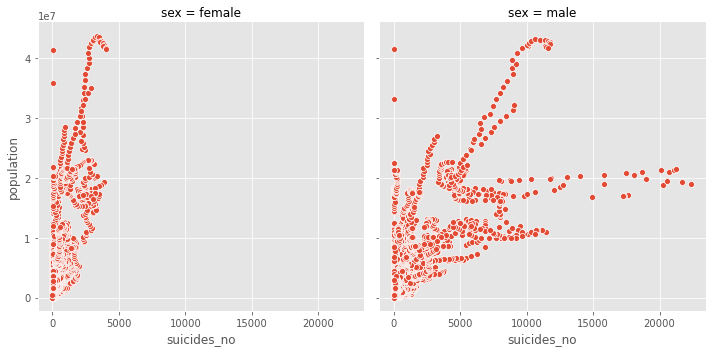

In [30]:
plt.style.use('ggplot')
sns.relplot(x= 'suicides_no', y= 'population', data = data, col= 'sex')
plt.show()

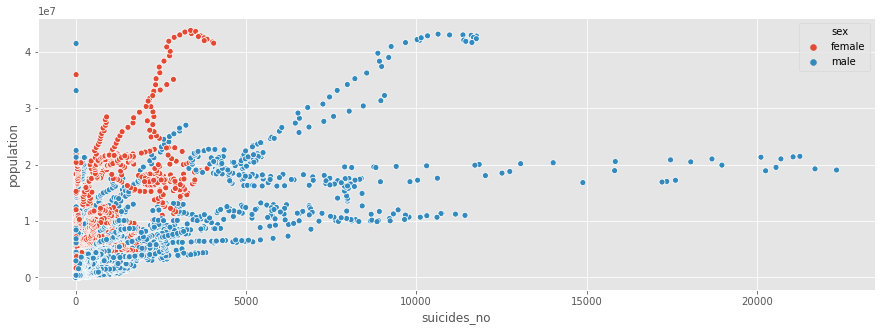

In [28]:
plt.figure(figsize= (15,5))
sns.scatterplot(x= 'suicides_no', y= 'population', data = data, hue = 'sex')
plt.show()

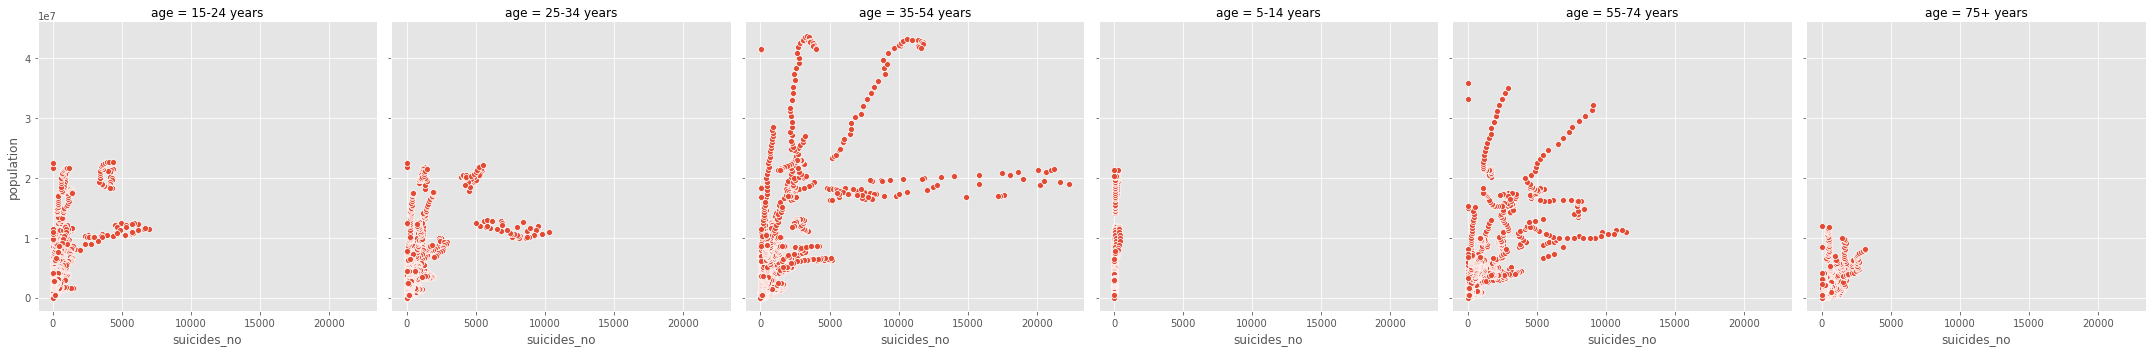

In [31]:
plt.style.use('ggplot')
sns.relplot(x= 'suicides_no', y= 'population', data = data, col= 'age')
plt.show()

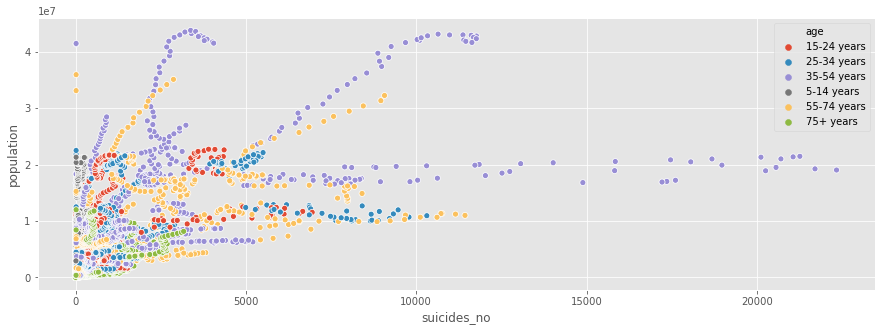

In [32]:
plt.figure(figsize= (15,5))
sns.scatterplot(x= 'suicides_no', y= 'population', data = data, hue = 'age')
plt.show()

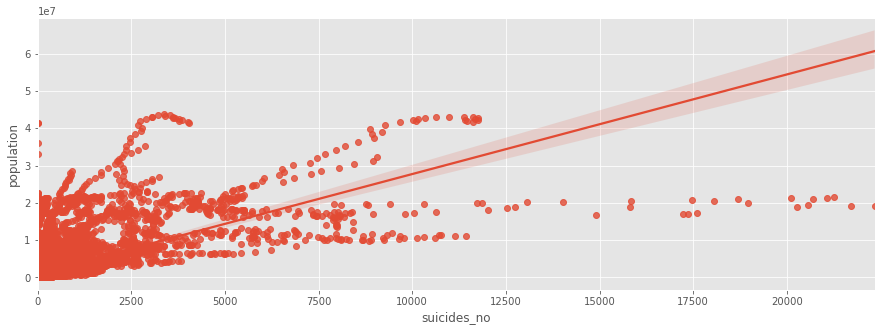

In [34]:
plt.figure(figsize= (15,5))
sns.regplot(x= 'suicides_no', y= 'population', data = data)
plt.show()

In [39]:
# mean population by sex and age
data.groupby(['sex', 'age'])['population'].mean()

sex     age        
female  15-24 years    1.534075e+06
        25-34 years    1.490698e+06
        35-54 years    2.466753e+06
        5-14 years     1.511182e+06
        55-74 years    1.632635e+06
        75+ years      5.942093e+05
male    15-24 years    1.586102e+06
        25-34 years    1.507253e+06
        35-54 years    2.413196e+06
        5-14 years     1.575972e+06
        55-74 years    1.382032e+06
        75+ years      3.540541e+05
Name: population, dtype: float64

In [41]:
data.groupby(['sex', 'age'])['suicides_no'].mean()

sex     age        
female  15-24 years     61.504660
        25-34 years     71.451206
        35-54 years    167.665296
        5-14 years       6.380482
        55-74 years    145.738761
        75+ years       73.044682
male    15-24 years    209.753838
        25-34 years    304.808936
        35-54 years    627.469572
        5-14 years      12.417763
        55-74 years    392.564967
        75+ years      136.092105
Name: suicides_no, dtype: float64

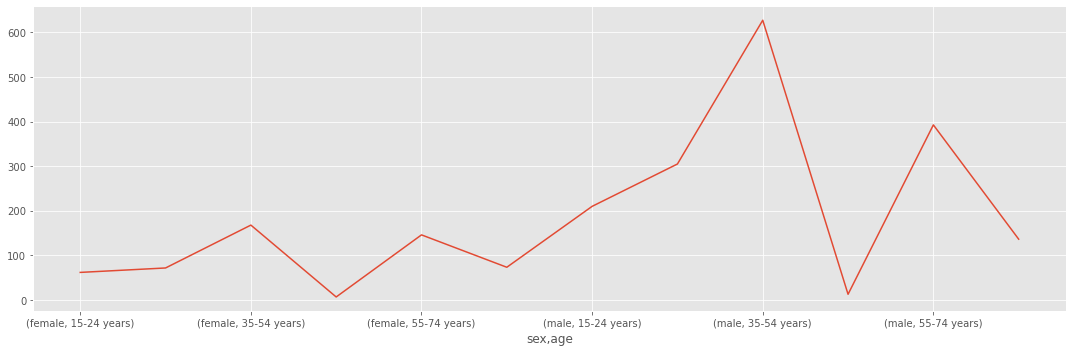

In [47]:
data.groupby(['sex', 'age'])['suicides_no'].mean().plot(figsize = (15,5))
plt.tight_layout()
plt.show()

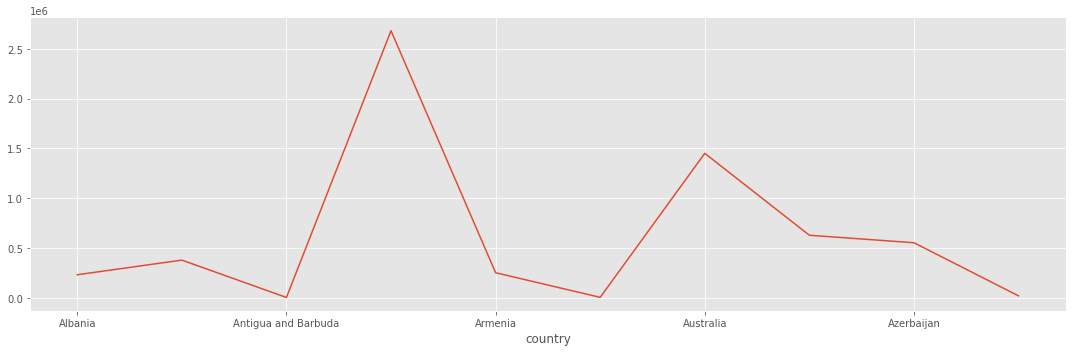

In [53]:
data.groupby(['country'])['population'].mean()[:10].plot(kind = 'line', figsize = (15,5))
plt.tight_layout()
plt.show()

In [63]:
# top 20 countries suicides on average
data.groupby(['country'])['suicides_no'].mean().sort_values(ascending = False)[:20]
# .plot(kind = 'line', figsize = (15,5))
# plt.tight_layout()
# plt.show()

country
Russian Federation          3475.296296
United States of America    2635.019737
Japan                       2111.743243
Germany                      933.532051
Ukraine                      922.570707
France                       915.509259
Republic of Korea            703.575269
Brazil                       564.918919
Sri Lanka                    420.557292
Poland                       390.923423
United Kingdom               365.092105
Italy                        353.770270
Thailand                     318.379902
Canada                       305.671429
Kazakhstan                   302.252451
Hungary                      285.127193
Mexico                       264.592342
Spain                        248.344595
Argentina                    211.400901
Iran (Islamic Rep of)        202.750000
Name: suicides_no, dtype: float64

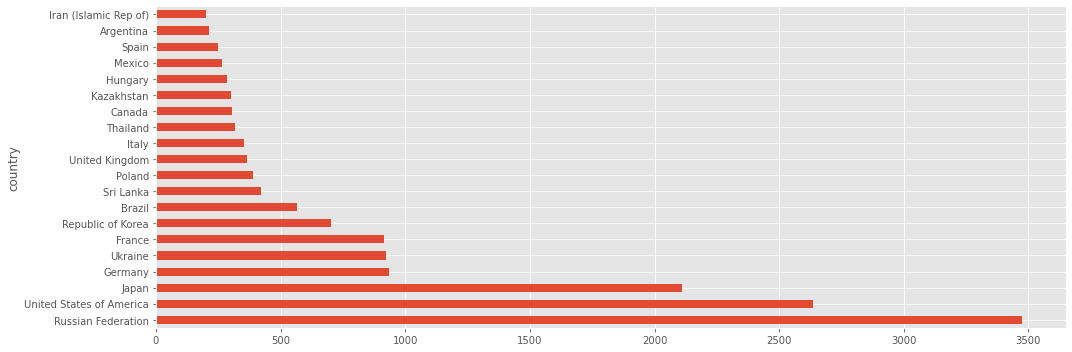

In [68]:
# top 20 countries suicides on average
data.groupby(['country'])['suicides_no'].mean().sort_values(ascending = False)[:20].plot(kind = 'barh', figsize = (15,5))
plt.tight_layout()
plt.show()

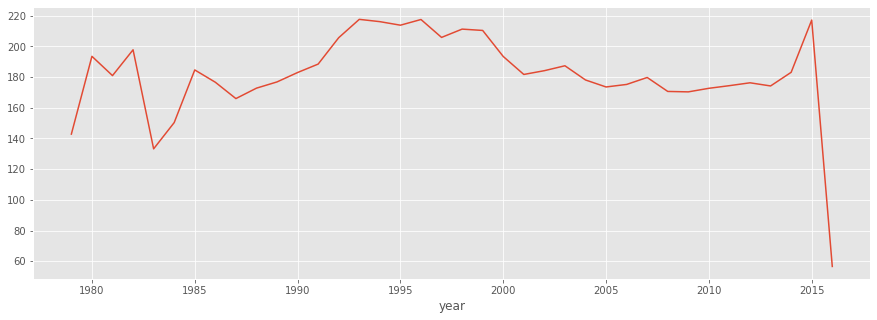

In [71]:
data.groupby(['year'])['suicides_no'].mean().plot(kind = 'line', figsize = (15,5))
plt.show()

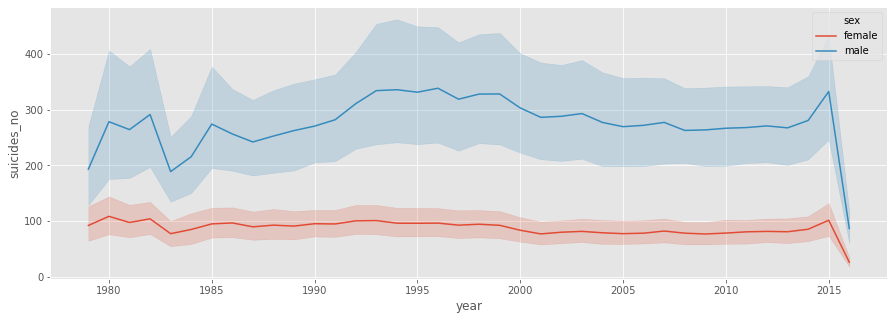

In [82]:
plt.figure(figsize= (15,5))
sns.lineplot(x = 'year', y = 'suicides_no', data = data, hue = 'sex')
plt.show()

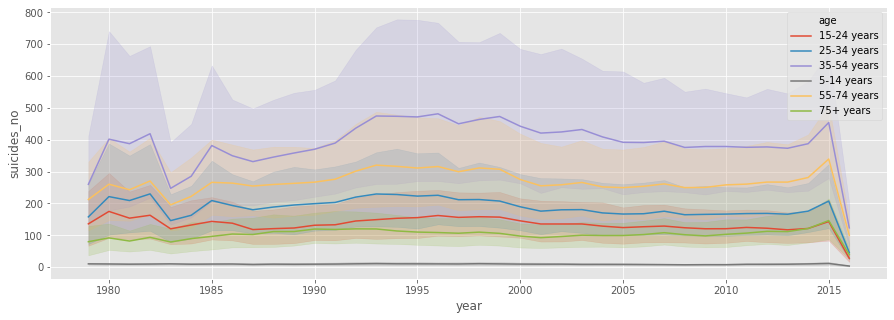

In [83]:
plt.figure(figsize= (15,5))
sns.lineplot(x = 'year', y = 'suicides_no', data = data, hue = 'age')
plt.show()

In [88]:
data.groupby('country')['suicides_no'].max().sort_values(ascending = False)[:20]

country
Russian Federation          22338.0
United States of America    11767.0
Japan                        8948.0
Ukraine                      5203.0
Republic of Korea            4255.0
Germany                      3427.0
France                       3379.0
Brazil                       3238.0
Poland                       2430.0
United Kingdom               1743.0
Kazakhstan                   1630.0
Sri Lanka                    1609.0
Mexico                       1560.0
Thailand                     1482.0
Canada                       1442.0
Hungary                      1421.0
Belarus                      1391.0
Italy                        1307.0
Spain                        1184.0
Romania                      1138.0
Name: suicides_no, dtype: float64

In [93]:
data.groupby(['year','country'])['suicides_no'].max().sort_values(ascending = False)

year  country                 
1994  Russian Federation          22338.0
1995  Russian Federation          21706.0
2001  Russian Federation          21262.0
2000  Russian Federation          21063.0
1999  Russian Federation          20705.0
                                   ...   
2002  Montserrat                      0.0
      Montenegro                      0.0
2006  Dominica                        0.0
2011  Montserrat                      0.0
1990  Turks and Caicos Islands        0.0
Name: suicides_no, Length: 3648, dtype: float64

In [90]:
data.groupby('country')['suicides_no'].min().sort_values()[:20]

country
Albania                           0.0
Qatar                             0.0
Puerto Rico                       0.0
Portugal                          0.0
Philippines                       0.0
Peru                              0.0
Paraguay                          0.0
Panama                            0.0
Oman                              0.0
Occupied Palestinian Territory    0.0
Norway                            0.0
Nicaragua                         0.0
New Zealand                       0.0
Netherlands Antilles              0.0
Netherlands                       0.0
Morocco                           0.0
Montserrat                        0.0
Montenegro                        0.0
Monaco                            0.0
Mayotte                           0.0
Name: suicides_no, dtype: float64